<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n250.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,-0.175776,139.870522,140.089354,-0.218832
1,0.0,1.0,57.329540,39.507566,0.081894,106.919000,107.005602,-0.086602
2,0.0,2.0,45.215694,88.427736,-0.541729,143.101701,143.562100,-0.460399
3,0.0,3.0,69.375325,88.876246,-0.350863,167.900707,168.146829,-0.246122
4,0.0,4.0,87.837297,74.451291,-0.252312,172.036275,172.244554,-0.208279
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.463389,96.661695,0.278486,165.403571,165.132504,0.271066
119996,999.0,116.0,99.359872,43.951691,-0.962301,152.349263,153.280801,-0.931538
119997,999.0,117.0,97.361060,72.443329,0.129429,179.933818,179.808290,0.125528
119998,999.0,118.0,61.455436,58.192155,-0.359317,129.288275,129.608413,-0.320138


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,-0.175776,139.870522,140.089354,-0.218832
1,0.0,1.0,57.329540,39.507566,0.081894,106.919000,107.005602,-0.086602
2,0.0,2.0,45.215694,88.427736,-0.541729,143.101701,143.562100,-0.460399
3,0.0,3.0,69.375325,88.876246,-0.350863,167.900707,168.146829,-0.246122
4,0.0,4.0,87.837297,74.451291,-0.252312,172.036275,172.244554,-0.208279
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.463389,96.661695,0.278486,165.403571,165.132504,0.271066
119996,999.0,116.0,99.359872,43.951691,-0.962301,152.349263,153.280801,-0.931538
119997,999.0,117.0,97.361060,72.443329,0.129429,179.933818,179.808290,0.125528
119998,999.0,118.0,61.455436,58.192155,-0.359317,129.288275,129.608413,-0.320138


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,-0.175776,139.870522,140.089354,-0.218832
1,0.0,1.0,57.329540,39.507566,0.081894,106.919000,107.005602,-0.086602
2,0.0,2.0,45.215694,88.427736,-0.541729,143.101701,143.562100,-0.460399
3,0.0,3.0,69.375325,88.876246,-0.350863,167.900707,168.146829,-0.246122
4,0.0,4.0,87.837297,74.451291,-0.252312,172.036275,172.244554,-0.208279
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.463389,96.661695,0.278486,165.403571,165.132504,0.271066
119996,999.0,116.0,99.359872,43.951691,-0.962301,152.349263,153.280801,-0.931538
119997,999.0,117.0,97.361060,72.443329,0.129429,179.933818,179.808290,0.125528
119998,999.0,118.0,61.455436,58.192155,-0.359317,129.288275,129.608413,-0.320138


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

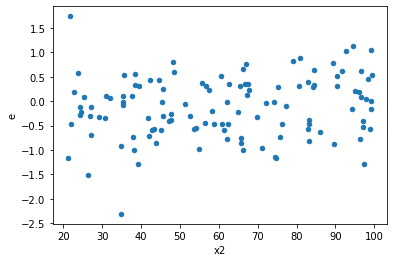

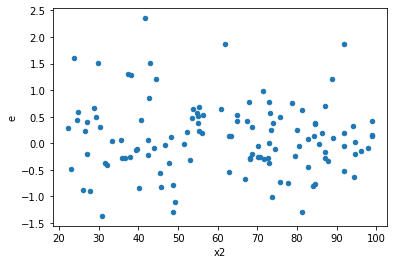

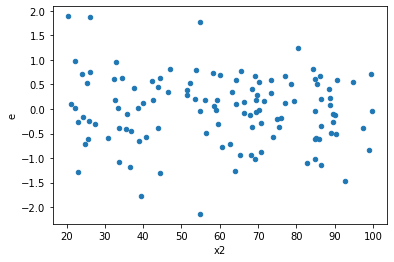

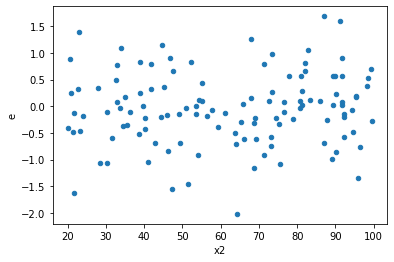

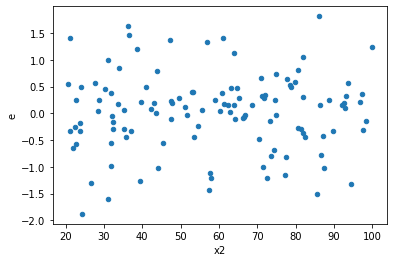

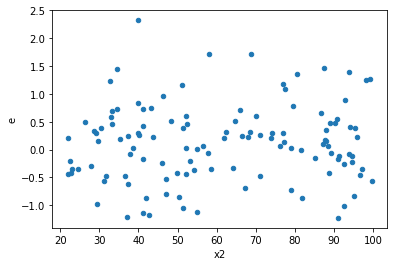

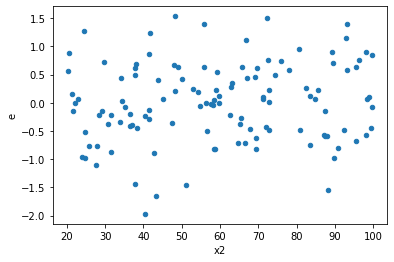

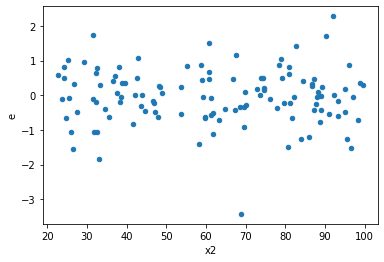

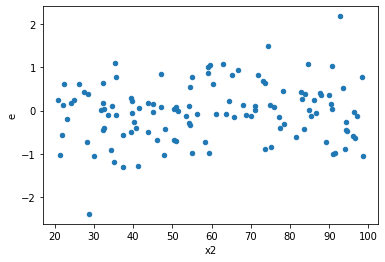

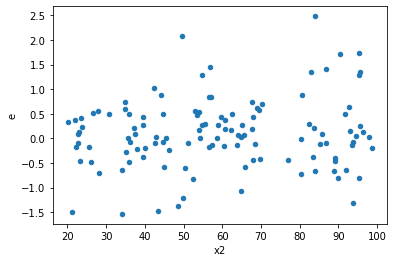

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,46.0,46.0,23.01525312140449,25.83172033759021,0.5003315895957499,0.5615591377737001,1.1223739405049757,0.6970783931077196,0.6514608034461402,0.3485391965538598,Reject005=1 : Homoscedasticity
9.0,46.0,46.0,18.87006461435577,23.484970006222184,0.41021879596425587,0.5105428262222214,1.2445622464035195,0.4610120895794514,0.7694939552102743,0.2305060447897257,Reject005=1 : Homoscedasticity
12.0,46.0,46.0,20.596626702932742,24.27375499582422,0.44775275441158136,0.5276903259961787,1.1785306082363427,0.5797616177902012,0.7101191911048994,0.2898808088951006,Reject005=1 : Homoscedasticity
15.0,46.0,46.0,10.917395983658972,25.53876162995589,0.23733469529693418,0.5551904702164324,2.3392722649413837,0.0047266439613828926,0.9976366780193086,0.0023633219806914463,Reject005=0 : Heteroscedasticity
16.0,46.0,46.0,23.09992547801089,26.76545955290707,0.5021722930002367,0.5818578163675451,1.1586816406998999,0.6195201415015485,0.6902399292492257,0.3097600707507743,Reject005=1 : Homoscedasticity
17.0,46.0,46.0,21.385736837458605,41.41415061326988,0.46490732255344797,0.9003076220276062,1.9365313866918121,0.02714840019489495,0.9864257999025525,0.013574200097447475,Reject005=0 : Heteroscedasticity
18.0,46.0,46.0,18.900152374794402,19.09592766151053,0.4108728777129218,0.41512886220675066,1.0103583972675911,0.9722736056551133,0.5138631971724433,0.48613680282755667,Reject005=1 : Homoscedasticity
19.0,46.0,46.0,17.12239223849846,27.16218260685401,0.37222591822822737,0.5904822305837828,1.5863544199029507,0.12124987040536239,0.9393750647973188,0.060624935202681196,Reject005=1 : Homoscedasticity
20.0,46.0,46.0,14.623013782686357,24.87907495699193,0.31789160397144256,0.5408494555867811,1.701364392232793,0.0747367149450513,0.9626316425274744,0.03736835747252565,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,29.973463958017113,25.646805490865322,0.6515970425655894,0.55753924980142,0.8556503688325111,0.5992142278318434,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,16.888470543244328,16.081789146795497,0.3671406639835723,0.34960411188685864,0.9522347867805285,0.8688902441869317,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,23.01525312140449,25.83172033759021,0.5003315895957499,0.5615591377737001,1.1223739405049757,0.6970783931077196,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,20.781943351908566,20.490283093918386,0.4517813772154036,0.44544093682431274,0.9859656889131403,0.9619793795929739,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,22.511986343016172,20.65572770790675,0.4893910074568733,0.44903755886753804,0.9175435429452771,0.7716621531459661,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,25.76281210282571,23.90370078087757,0.5600611326701241,0.5196456691495124,0.9278374070917424,0.8005864631974323,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,25.20477953899602,22.703205305579083,0.5479299899781743,0.49354794142563224,0.9007500053889945,0.7244863926935488,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,24.214405588291175,14.416271302181933,0.5264001214845908,0.31339720222134637,0.5953592893130067,0.08194817046718089,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,27.856828925956645,21.663059133564925,0.6055832375207967,0.4709360681209766,0.7776570402591501,0.39696941287235066,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      927
Reject005=0 : Heteroscedasticity     73
Name: Result_test, dtype: int64